In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
filePath = "./Data/powerconsumption.csv"
power_data = pd.read_csv(filePath)
power_df = pd.DataFrame(power_data)

FileNotFoundError: [Errno 2] No such file or directory: './Data/powerconsumption.csv'

In [3]:
power_data.head

<bound method NDFrame.head of                Datetime  Temperature  Humidity  WindSpeed  \
0         1/1/2017 0:00        6.559      73.8      0.083   
1         1/1/2017 0:10        6.414      74.5      0.083   
2         1/1/2017 0:20        6.313      74.5      0.080   
3         1/1/2017 0:30        6.121      75.0      0.083   
4         1/1/2017 0:40        5.921      75.7      0.081   
...                 ...          ...       ...        ...   
52411  12/30/2017 23:10        7.010      72.4      0.080   
52412  12/30/2017 23:20        6.947      72.6      0.082   
52413  12/30/2017 23:30        6.900      72.8      0.086   
52414  12/30/2017 23:40        6.758      73.0      0.080   
52415  12/30/2017 23:50        6.580      74.1      0.081   

       GeneralDiffuseFlows  DiffuseFlows  PowerConsumption_Zone1  \
0                    0.051         0.119             34055.69620   
1                    0.070         0.085             29814.68354   
2                    0.062       

In [4]:
# extract hour the Datetime column
power_df['Hour'] = pd.to_datetime(power_df['Datetime']).dt.hour

In [5]:
power_df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Hour
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,0
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,0
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,0
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,0


In [6]:
power_df.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Hour
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218,11.500000
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099,6.922253
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070,0.000000
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630,5.750000
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470,11.500000
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420,17.250000
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360,23.000000


In [7]:
# Check for missing values
power_df.isnull().sum()

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
Hour                      0
dtype: int64

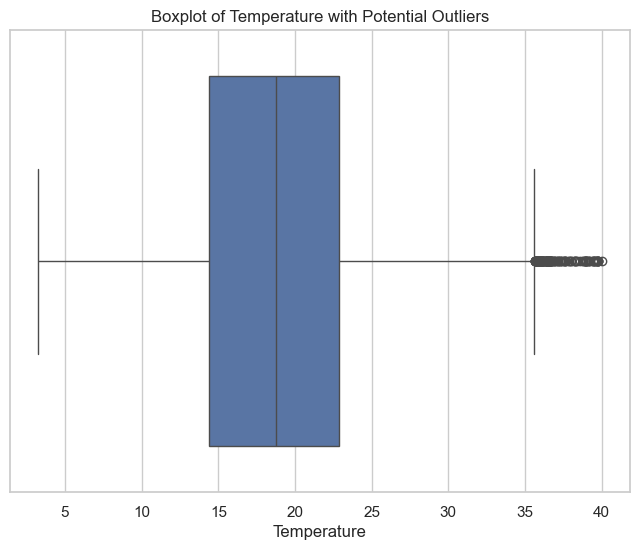

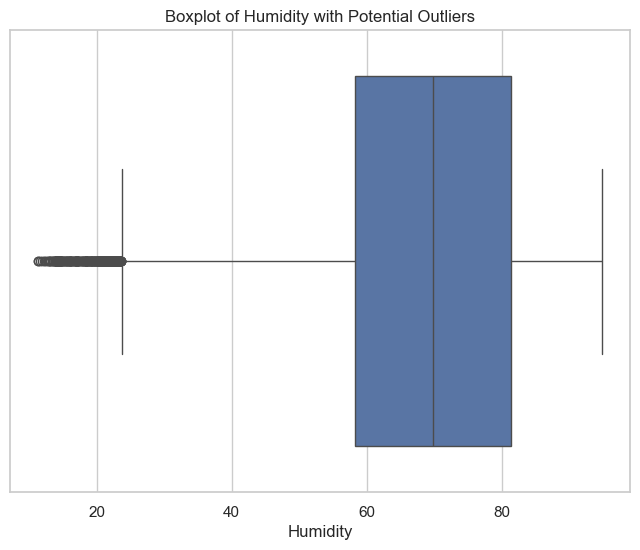

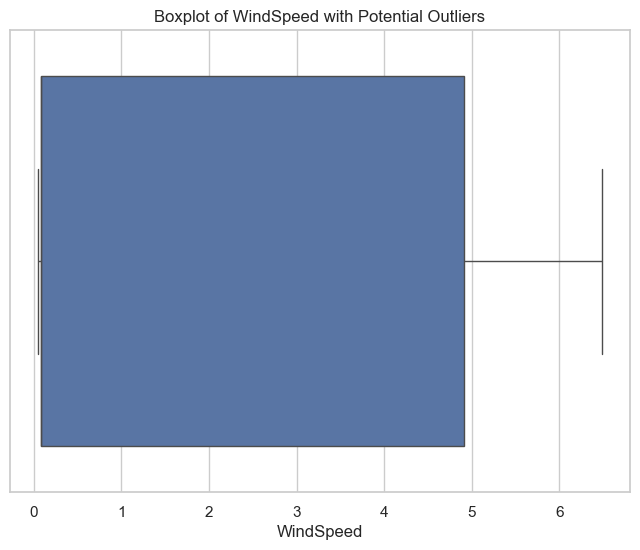

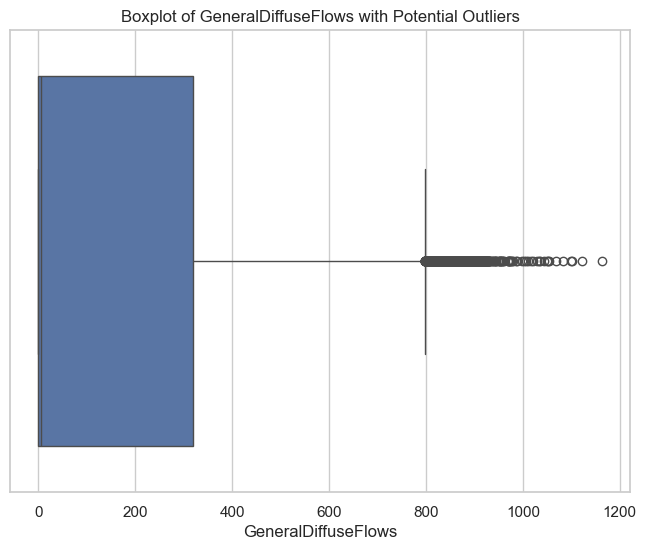

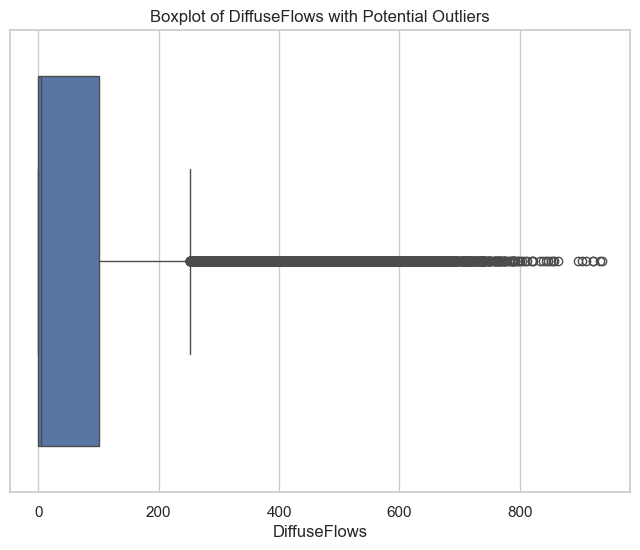

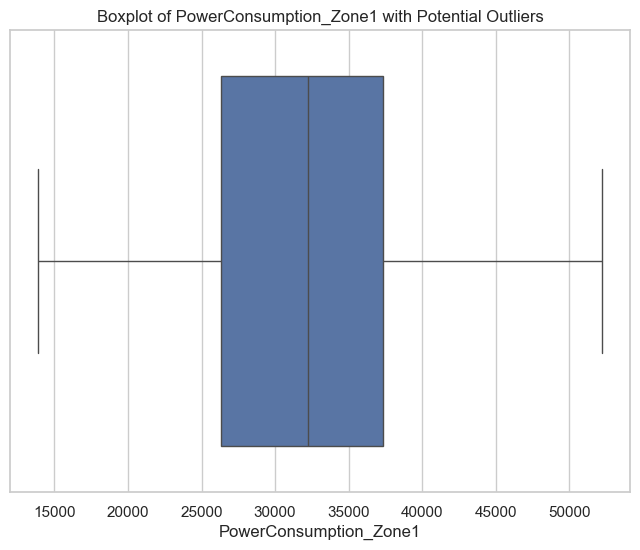

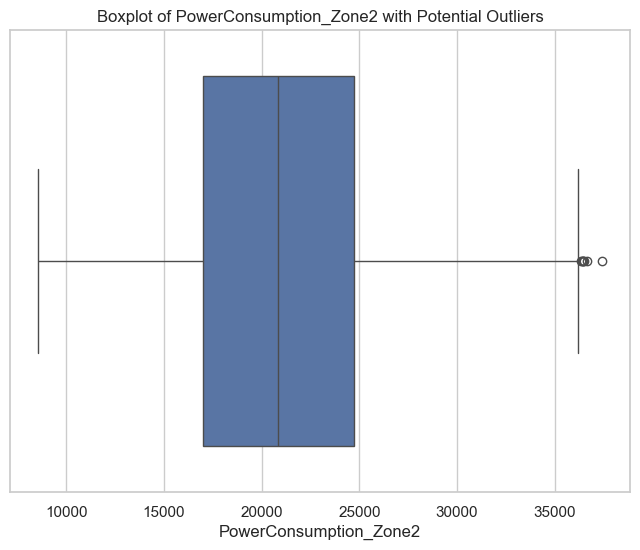

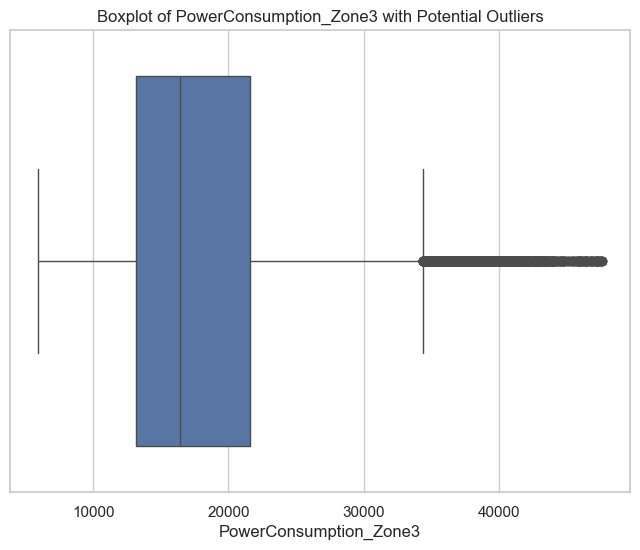

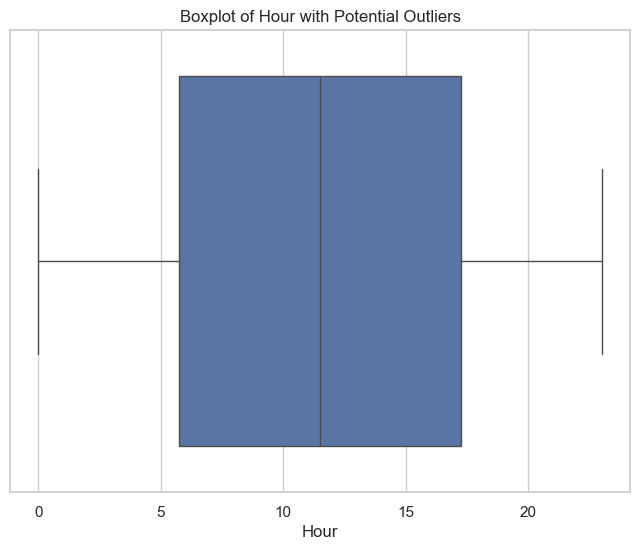

In [8]:
# Function to plot outliers
for col in power_df.columns[1:]:
    # Calculate Q1 and Q3 values
    Q1 = power_df[col].quantile(0.25)
    Q3 = power_df[col].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define lower and upper bounds for potential outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Plot boxplot for the column
    plt.figure(figsize=(8, 6))
    sns.set(style="whitegrid")
    sns.boxplot(x=power_df[col], orient="h")
    plt.title(f"Boxplot of {col} with Potential Outliers")
    plt.show()

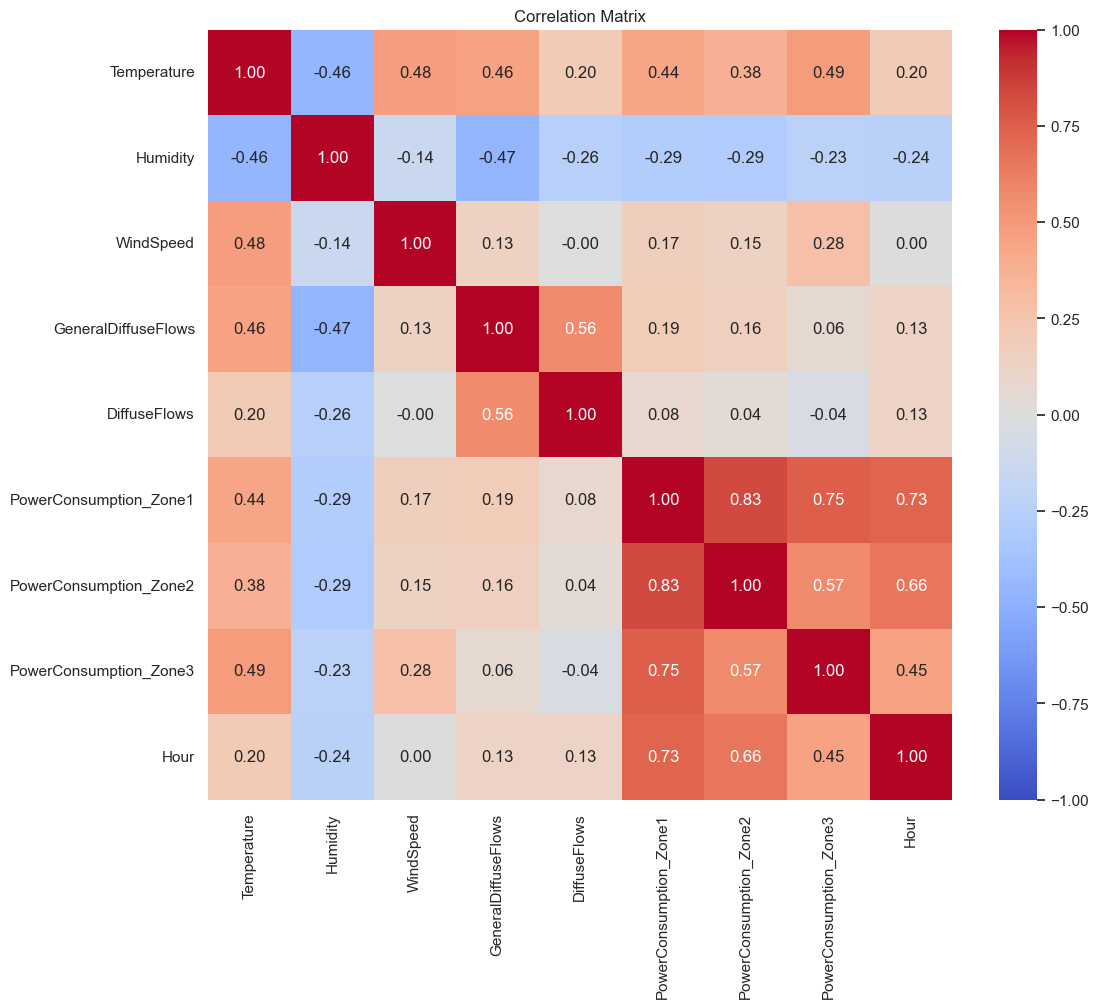

In [9]:
# all columns except the first one
corr_df = power_df[power_df.columns[1:]]
# calculate the correlation matrix
correlation_matrix = corr_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

The plan is to convert power consumption into classes. Then make a model using temp humidity and windspeed to predict power consumption. Also the plan is to use three models to predict temp humidity and windspeed and use them to predict power consumption.

In [10]:
power_df = power_df.drop(columns=['Datetime','GeneralDiffuseFlows', 'DiffuseFlows'])

Merging power data

In [11]:
# total power consumption
power_df['TotalPower'] = power_df['PowerConsumption_Zone1'] + power_df['PowerConsumption_Zone2'] + power_df['PowerConsumption_Zone3']

In [12]:
power_df.head()

,Temperature,Humidity,WindSpeed,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Hour,TotalPower
0,6.559,73.8,0.083,34055.69620,16128.87538,20240.96386,0,70425.53544
1,6.414,74.5,0.083,29814.68354,19375.07599,20131.08434,0,69320.84387
2,6.313,74.5,0.080,29128.10127,19006.68693,19668.43373,0,67803.22193
3,6.121,75.0,0.083,28228.86076,18361.09422,18899.27711,0,65489.23209
4,5.921,75.7,0.081,27335.69620,17872.34043,18442.40964,0,63650.44627


In [13]:
power_df.describe()

,Temperature,Humidity,WindSpeed,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Hour,TotalPower
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,32344.970564,21042.509082,17835.406218,11.500000,71222.885864
std,5.815476,15.551177,2.348862,7130.562564,5201.465892,6622.165099,6.922253,17143.138964
min,3.247000,11.340000,0.050000,13895.696200,8560.081466,5935.174070,0.000000,36785.039739
25%,14.410000,58.310000,0.078000,26310.668692,16980.766032,13129.326630,5.750000,56499.074640
50%,18.780000,69.860000,0.086000,32265.920340,20823.168405,16415.117470,11.500000,69788.790940
75%,22.890000,81.400000,4.915000,37309.018185,24713.717520,21624.100420,17.250000,83749.172310
max,40.010000,94.800000,6.483000,52204.395120,37408.860760,47598.326360,23.000000,134208.145950


In [14]:
power_df = power_df.drop(columns=['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'])

In [15]:
power_df.head()

,Temperature,Humidity,WindSpeed,Hour,TotalPower
0,6.559,73.8,0.083,0,70425.53544
1,6.414,74.5,0.083,0,69320.84387
2,6.313,74.5,0.080,0,67803.22193
3,6.121,75.0,0.083,0,65489.23209
4,5.921,75.7,0.081,0,63650.44627


In [16]:
power_df.describe()

,Temperature,Humidity,WindSpeed,Hour,TotalPower
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,11.500000,71222.885864
std,5.815476,15.551177,2.348862,6.922253,17143.138964
min,3.247000,11.340000,0.050000,0.000000,36785.039739
25%,14.410000,58.310000,0.078000,5.750000,56499.074640
50%,18.780000,69.860000,0.086000,11.500000,69788.790940
75%,22.890000,81.400000,4.915000,17.250000,83749.172310
max,40.010000,94.800000,6.483000,23.000000,134208.145950


In [17]:
# converting total power consumption to classification
# Create the bins based on quantiles
bins = [0, power_df['TotalPower'].quantile(0.333), power_df['TotalPower'].quantile(0.666), power_df['TotalPower'].max()]
labels = ['Low', 'Moderate', 'High']

# Use pd.cut to categorize TotalPower into classes
power_df['PowerClass'] = pd.cut(power_df['TotalPower'], bins=bins, labels=labels, include_lowest=True)


In [18]:
power_df.head()

,Temperature,Humidity,WindSpeed,Hour,TotalPower,PowerClass
0,6.559,73.8,0.083,0,70425.53544,Moderate
1,6.414,74.5,0.083,0,69320.84387,Moderate
2,6.313,74.5,0.080,0,67803.22193,Moderate
3,6.121,75.0,0.083,0,65489.23209,Moderate
4,5.921,75.7,0.081,0,63650.44627,Moderate


In [19]:
power_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Temperature  52416 non-null  float64 
 1   Humidity     52416 non-null  float64 
 2   WindSpeed    52416 non-null  float64 
 3   Hour         52416 non-null  int32   
 4   TotalPower   52416 non-null  float64 
 5   PowerClass   52416 non-null  category
dtypes: category(1), float64(4), int32(1)
memory usage: 1.8 MB


In [20]:
power_df.nunique()

Temperature     3437
Humidity        4443
WindSpeed        548
Hour              24
TotalPower     52416
PowerClass         3
dtype: int64

In [21]:
power_df['PowerClass'].value_counts()

PowerClass
High        17507
Low         17455
Moderate    17454
Name: count, dtype: int64

/var/folders/93/p0s3sy4d5hlgxwt8fpdw08sh0000gn/T/ipykernel_58561/3585597140.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = power_df.pivot_table(index='TempBin', columns='HumidityBin', values='TotalPower', aggfunc='mean')


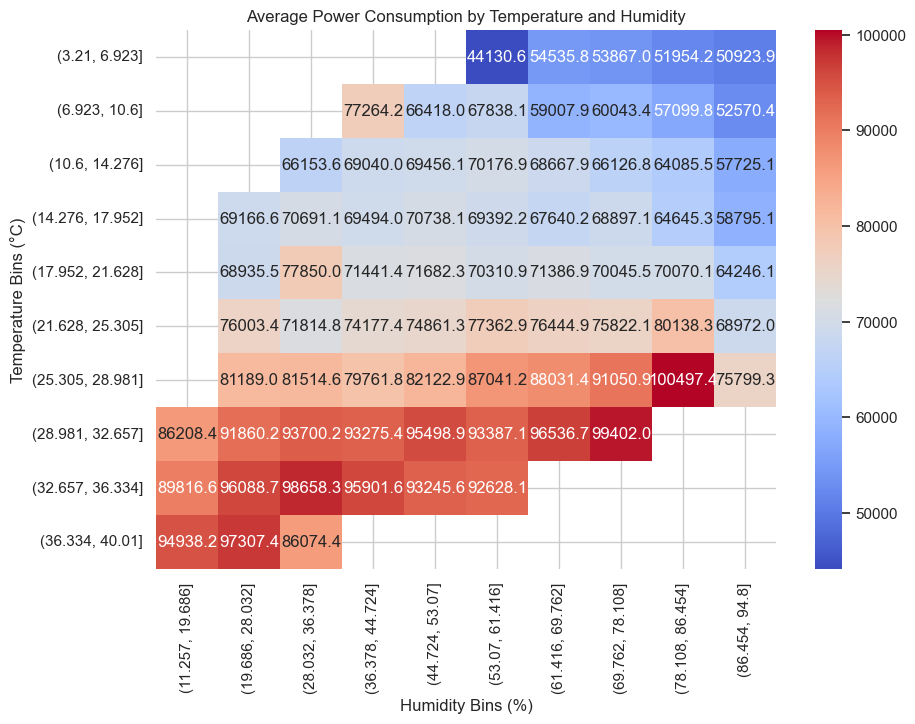

In [22]:
# Define temperature and humidity bins for aggregation
power_df['TempBin'] = pd.cut(power_df['Temperature'], bins=10)
power_df['HumidityBin'] = pd.cut(power_df['Humidity'], bins=10)

# Pivot the data to create a 2D table with Temperature and Humidity bins
heatmap_data = power_df.pivot_table(index='TempBin', columns='HumidityBin', values='TotalPower', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Average Power Consumption by Temperature and Humidity')
plt.xlabel('Humidity Bins (%)')
plt.ylabel('Temperature Bins (°C)')
plt.show()


In [23]:
power_df.drop(columns=['TotalPower'], inplace=True)

In [24]:
power_df.head()

,Temperature,Humidity,WindSpeed,Hour,PowerClass,TempBin,HumidityBin
0,6.559,73.8,0.083,0,Moderate,"(3.21, 6.923]","(69.762, 78.108]"
1,6.414,74.5,0.083,0,Moderate,"(3.21, 6.923]","(69.762, 78.108]"
2,6.313,74.5,0.080,0,Moderate,"(3.21, 6.923]","(69.762, 78.108]"
3,6.121,75.0,0.083,0,Moderate,"(3.21, 6.923]","(69.762, 78.108]"
4,5.921,75.7,0.081,0,Moderate,"(3.21, 6.923]","(69.762, 78.108]"


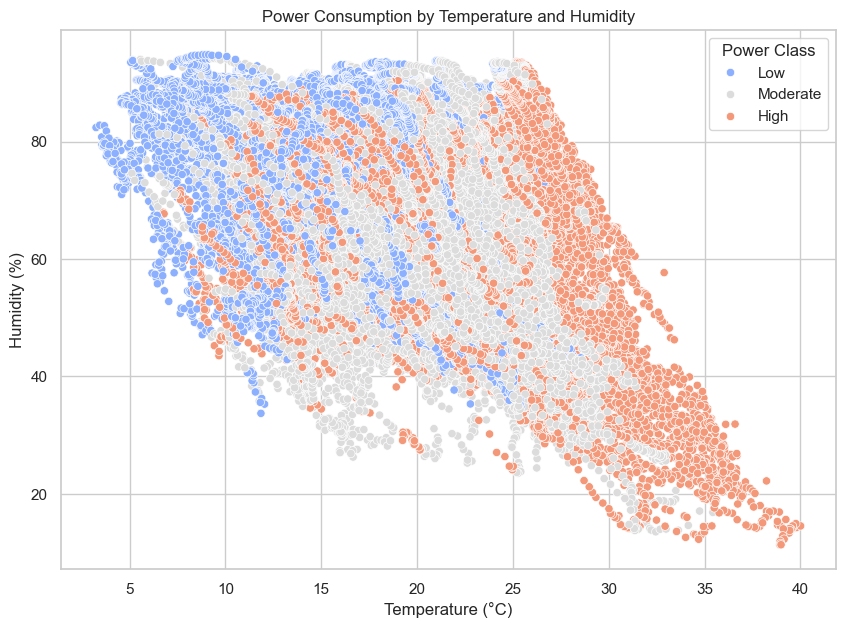

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with temperature and humidity, color-coded by PowerClass
plt.figure(figsize=(10, 7))
sns.scatterplot(data=power_df, x='Temperature', y='Humidity', hue='PowerClass', palette='coolwarm')

plt.title('Power Consumption by Temperature and Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.legend(title='Power Class')
plt.show()


**Scaling**

Since the weather could have different pattern in different places, we will normalise the data so that the model could be used for multiple locations

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Initialize the scaler
scaler = RobustScaler()
#scaler = StandardScaler()
# scaler = MinMaxScaler()

# Normalize the features
og = power_df[['Temperature', 'Humidity', 'WindSpeed']]
power_df[['Temperature', 'Humidity', 'WindSpeed']] = scaler.fit_transform(power_df[['Temperature', 'Humidity', 'WindSpeed']])
power_df.head()

,Temperature,Humidity,WindSpeed,Hour,PowerClass,TempBin,HumidityBin
0,-1.441156,0.170637,-0.000620,0,Moderate,"(3.21, 6.923]","(69.762, 78.108]"
1,-1.458255,0.200953,-0.000620,0,Moderate,"(3.21, 6.923]","(69.762, 78.108]"
2,-1.470165,0.200953,-0.001240,0,Moderate,"(3.21, 6.923]","(69.762, 78.108]"
3,-1.492807,0.222607,-0.000620,0,Moderate,"(3.21, 6.923]","(69.762, 78.108]"
4,-1.516392,0.252923,-0.001034,0,Moderate,"(3.21, 6.923]","(69.762, 78.108]"


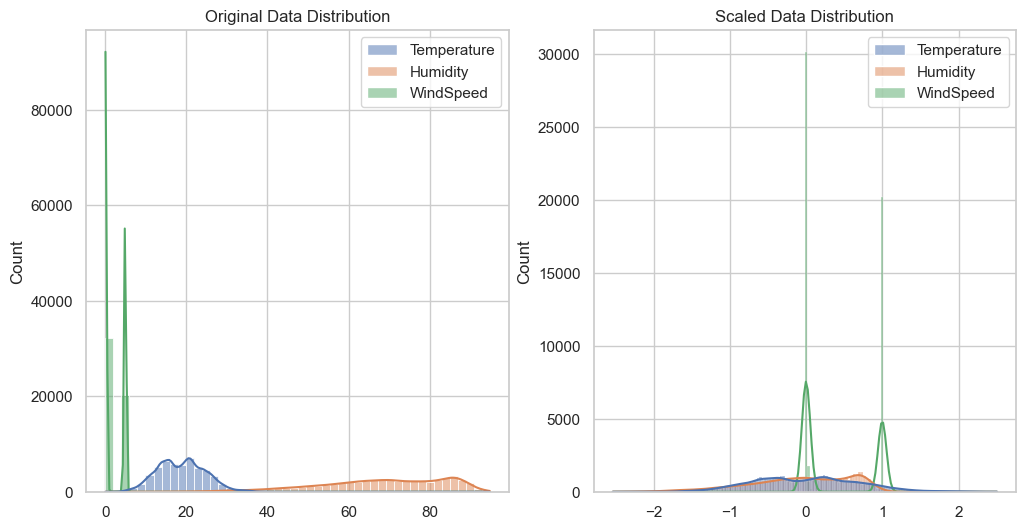

In [27]:
# Plot original data
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(og, kde=True)
plt.title('Original Data Distribution')

# After scaling
plt.subplot(1, 2, 2)
sns.histplot(power_df[['Temperature', 'Humidity', 'WindSpeed']], kde=True)
plt.title('Scaled Data Distribution')
plt.show()

In [28]:
# save the data
power_df.to_csv('./Data/powerconsumption_cleaned.csv', index=False)

# Data Cleaning and transforming done

The rest of code bellow is just the model which was moved to powerconsumption_model file so that we would only need the cleaned data to run the file
I did not delete the code from here so that in case I made a mistake copy pasting, I would still have the orignal

In [29]:
# load the data
power_data = pd.read_csv('./Data/powerconsumption_cleaned.csv')
power_df = pd.DataFrame(power_data)

In [30]:
# Splitting the data
X = power_df[['Temperature', 'Humidity', 'WindSpeed', 'Hour']]
y = power_df['PowerClass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Training the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred_RFC = model.predict(X_test)

In [32]:
import joblib
# Save the model
joblib.dump(model, './models/power_consumption.pkl')
print("Model dumped!")

Model dumped!


In [33]:
print("RandomForestClassifier Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_RFC):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_RFC, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_RFC, average='macro'):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_RFC, average='macro'):.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_RFC))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_RFC))

RandomForestClassifier Evaluation:
Accuracy: 0.92
Precision: 0.9161
Recall: 0.92
F1-Score: 0.92

Confusion Matrix:
[[3254   31  291]
 [   8 3268  179]
 [ 204  171 3078]]

Classification Report:
              precision    recall  f1-score   support

        High       0.94      0.91      0.92      3576
         Low       0.94      0.95      0.94      3455
    Moderate       0.87      0.89      0.88      3453

    accuracy                           0.92     10484
   macro avg       0.92      0.92      0.92     10484
weighted avg       0.92      0.92      0.92     10484



In [34]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the test data
y_pred_log_reg = log_reg.predict(X_test)

In [35]:
print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg, average='macro'):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_log_reg, average='macro'):.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Evaluation:
Accuracy: 0.72
Precision: 0.7081
Recall: 0.71
F1-Score: 0.71

Confusion Matrix:
[[2679  253  644]
 [  26 2999  430]
 [1056  577 1820]]

Classification Report:
              precision    recall  f1-score   support

        High       0.71      0.75      0.73      3576
         Low       0.78      0.87      0.82      3455
    Moderate       0.63      0.53      0.57      3453

    accuracy                           0.72     10484
   macro avg       0.71      0.71      0.71     10484
weighted avg       0.71      0.72      0.71     10484



In [36]:
# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test data
y_pred_knn = knn.predict(X_test)

In [37]:
# Evaluate Logistic Regression
print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg, average='macro'):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_log_reg, average='macro'):.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Evaluation:
Accuracy: 0.72
Precision: 0.7081
Recall: 0.71
F1-Score: 0.71

Confusion Matrix:
[[2679  253  644]
 [  26 2999  430]
 [1056  577 1820]]

Classification Report:
              precision    recall  f1-score   support

        High       0.71      0.75      0.73      3576
         Low       0.78      0.87      0.82      3455
    Moderate       0.63      0.53      0.57      3453

    accuracy                           0.72     10484
   macro avg       0.71      0.71      0.71     10484
weighted avg       0.71      0.72      0.71     10484

